In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

data = "All along it was a fever \n A cold sweat, hot headed believer \n I threw my hands in the air, said, Show me something \n He said, If you dare, come a little closer \n Round and around and around and around we go\n  Oh, now tell me now, tell me now, tell me now you know \n Not really sure how to feel about it \n Something in the way you move \n Makes me feel like I can't live without you \n It takes me all the way \n I want you to stay. \n It's not much of a life you're living. \n It's not just something you take, it's given\n  Round and around and around and around we go \n Oh, now tell me now, tell me now, \n tell me now you know Not really sure how to feel about it\n Something in the way you move Makes me feel like I can't live without you\n  It takes me all the way And I want you to stay Ooh, the reason"

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'me': 1, 'you': 2, 'now': 3, 'and': 4, 'the': 5, 'around': 6, 'tell': 7, 'it': 8, 'i': 9, 'a': 10, 'something': 11, 'not': 12, 'to': 13, 'feel': 14, 'way': 15, 'all': 16, 'in': 17, "it's": 18, 'said': 19, 'round': 20, 'we': 21, 'go': 22, 'oh': 23, 'know': 24, 'really': 25, 'sure': 26, 'how': 27, 'about': 28, 'move': 29, 'makes': 30, 'like': 31, "can't": 32, 'live': 33, 'without': 34, 'takes': 35, 'want': 36, 'stay': 37, 'along': 38, 'was': 39, 'fever': 40, 'cold': 41, 'sweat': 42, 'hot': 43, 'headed': 44, 'believer': 45, 'threw': 46, 'my': 47, 'hands': 48, 'air': 49, 'show': 50, 'he': 51, 'if': 52, 'dare': 53, 'come': 54, 'little': 55, 'closer': 56, 'much': 57, 'of': 58, 'life': 59, "you're": 60, 'living': 61, 'just': 62, 'take': 63, 'given': 64, 'ooh': 65, 'reason': 66}
67


In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['all'])
print(tokenizer.word_index['along'])
print(tokenizer.word_index['it'])
print(tokenizer.word_index['was'])
print(tokenizer.word_index['a'])
print(tokenizer.word_index['fever'])


16
38
8
39
10
40


In [ ]:
print(xs[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 10]


In [ ]:
print(ys[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 10]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'me': 1, 'you': 2, 'now': 3, 'and': 4, 'the': 5, 'around': 6, 'tell': 7, 'it': 8, 'i': 9, 'a': 10, 'something': 11, 'not': 12, 'to': 13, 'feel': 14, 'way': 15, 'all': 16, 'in': 17, "it's": 18, 'said': 19, 'round': 20, 'we': 21, 'go': 22, 'oh': 23, 'know': 24, 'really': 25, 'sure': 26, 'how': 27, 'about': 28, 'move': 29, 'makes': 30, 'like': 31, "can't": 32, 'live': 33, 'without': 34, 'takes': 35, 'want': 36, 'stay': 37, 'along': 38, 'was': 39, 'fever': 40, 'cold': 41, 'sweat': 42, 'hot': 43, 'headed': 44, 'believer': 45, 'threw': 46, 'my': 47, 'hands': 48, 'air': 49, 'show': 50, 'he': 51, 'if': 52, 'dare': 53, 'come': 54, 'little': 55, 'closer': 56, 'much': 57, 'of': 58, 'life': 59, "you're": 60, 'living': 61, 'just': 62, 'take': 63, 'given': 64, 'ooh': 65, 'reason': 66}


In [ ]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
5/5 [==============================] - 0s 10ms/step - loss: 4.2040 - accuracy: 0.0137
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 4.1912 - accuracy: 0.0411
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 4.1796 - accuracy: 0.0822
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 4.1649 - accuracy: 0.0890
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 4.1474 - accuracy: 0.0822
Epoch 6/500
5/5 [==============================] - 0s 8ms/step - loss: 4.1234 - accuracy: 0.0753
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 4.0894 - accuracy: 0.0822
Epoch 8/500
5/5 [==============================] - 0s 8ms/step - loss: 4.0412 - accuracy: 0.0822
Epoch 9/500
5/5 [==============================] - 0s 8ms/step - loss: 3.9779 - accuracy: 0.0822
Epoch 10/500
5/5 [==============================] - 0s 8ms/step - loss: 3.9147 - accuracy: 0.0822
Epoch 11/500
5/5 [==========

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

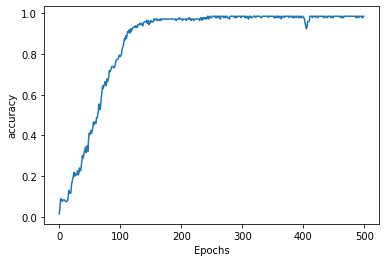

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "I can't live"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

NameError: ignored